# Compression and Entropy
## Introduction
In this notebook, we will explore how compression and entropy are related. We will use the `zlib` library to compress data using the LZ77 algorithm and calculate the entropy of the data. We will then compare the compression ratio with the entropy of the data.
<br>
https://corpus.canterbury.ac.nz/descriptions/


In [47]:
import math
from pathlib import Path
import time
import zlib
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

sns.set_theme(style="whitegrid")


In [48]:
sample_dir = Path("samples/entropy")
files = [f for f in sample_dir.iterdir() if f.is_file()]

def read_file_content(file_path: Path) -> bytes:
    return file_path.read_bytes()

In [49]:
# LZ77 compression and decompression

def compress_lz77(data: bytes) -> bytes:
    return zlib.compress(data)

def decompress_lz77(data: bytes) -> bytes:
    return zlib.decompress(data)

### Shannon Entropy Formula

The Shannon entropy formula is:

$$
H(X) = - \sum_{i=1}^{n} p(x_i) \cdot \log_2(p(x_i))
$$

Where $p(x_i)$ is the probability of the $i$-th byte occurring in the data.


In [50]:
def calculate_entropy(data: bytes) -> float:
    # Count the frequency of each byte
    byte_counts = Counter(data)
    total_bytes = len(data)
    
    entropy = 0
    for count in byte_counts.values():
        probability = count / total_bytes
        entropy -= probability * math.log2(probability)
        
    return entropy

In [51]:
results = []

for file_path in files:
    data = read_file_content(file_path)
    original_size = len(data)
    file_name = file_path.name
    entropy = calculate_entropy(data)
    
    algorithms = [
        ("LZ77", compress_lz77, decompress_lz77),
    ]

    for algorithm_name, compress_func, decompress_func in algorithms:
        start_time = time.perf_counter()
        compressed_data = compress_func(data)
        compression_time = time.perf_counter() - start_time

        compressed_size = len(compressed_data)
        compression_ratio = original_size / compressed_size

        start_time = time.perf_counter()
        decompressed_data = decompress_func(compressed_data)
        decompression_time = time.perf_counter() - start_time

        results.append({
            "file": file_name,
            "algorithm": algorithm_name,
            "original size (bytes)": original_size,
            "compressed size (bytes)": compressed_size,
            "compression ratio": compression_ratio,
            "compression time (seconds)": compression_time,
            "decompression time (seconds)": decompression_time,
            "entropy (bits/symbol)": entropy
        })

In [52]:
df = pd.DataFrame(results)
df

,file,algorithm,original size (bytes),compressed size (bytes),compression ratio,compression time (seconds),decompression time (seconds),entropy (bits/symbol)
0,encrypted_file_000_entropy.txt,LZ77,100032,100073,0.999590,0.002376,0.000050,7.998140
1,encrypted_file_010_entropy.txt,LZ77,100032,100073,0.999590,0.002223,0.000031,7.997884
2,encrypted_file_020_entropy.txt,LZ77,100032,100073,0.999590,0.002159,0.000030,7.998498
3,encrypted_file_030_entropy.txt,LZ77,100032,100073,0.999590,0.002832,0.000042,7.998002
4,encrypted_file_040_entropy.txt,LZ77,100032,100073,0.999590,0.002440,0.000036,7.998138
...,...,...,...,...,...,...,...,...
1095,file_995_entropy.txt,LZ77,100000,75206,1.329681,0.003508,0.000311,5.953822
1096,file_996_entropy.txt,LZ77,100000,75199,1.329805,0.003142,0.000311,5.953915
1097,file_997_entropy.txt,LZ77,100000,75203,1.329734,0.003372,0.000320,5.953695
1098,file_998_entropy.txt,LZ77,100000,75188,1.329999,0.003261,0.000320,5.953621


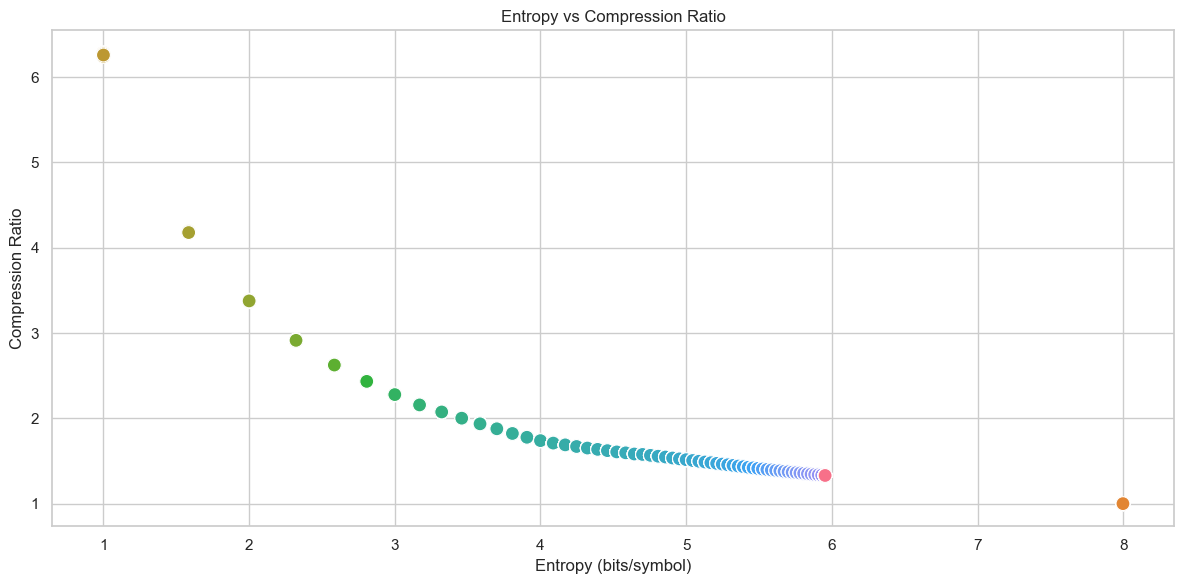

In [53]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="entropy (bits/symbol)", y="compression ratio", hue="file", style="algorithm", s=100, legend=False)
plt.title("Entropy vs Compression Ratio")
plt.xlabel("Entropy (bits/symbol)")
plt.ylabel("Compression Ratio")
plt.tight_layout()
plt.show()